<div align="right">Python 2.7 Jupyter Notebook</div>

# Data exploration: Test your intuition about BSSIDs

<div class="alert alert-warning">
**This notebook contains advanced exercises that are only applicable to students who wish to deepen their understanding and qualify for bonus marks on this course.** You will be able to achieve 100% for this notebook by successfully completing exercises 1, and 2. An optional, additional exercise can be completed to qualify for bonus marks.
</div>

### Your completion of the notebook exercises will be graded based on your ability to do the following: 

> **Understand**: Do your pseudo-code and comments show evidence that you recall and understand technical concepts?

> **Apply**: Are you able to execute code (using the supplied examples) that performs the required functionality on supplied or generated data sets? 

> **Evaluate**: Are you able to interpret the results and justify your interpretation based on the observed data?

#### Notebook objectives
By the end of this notebook, you will be expected to:
> - Understand and use BSSIDs;
- Review data using the ``info()`` and ``describe()`` functions; and
- Interpret data using your own behaviors and patterns.
 
####  List of exercises
>   - **Exercise 1**: Using Pandas' ``describe()`` and ``info()`` methods to review data..
  - **Exercise 2 **: Access point identification.
  - **Exercise 3 [Advanced]**: Trending access point information.

# Notebook introduction

In this notebook, you will examine the WiFi scan data set that you loaded in an exercise in Module 1's Notebook 2. You will also use the public data set from Dartmouth College, [(StudentLife)](http://studentlife.cs.dartmouth.edu/dataset.html) that was introduced in Module 1.

Before continuing with this notebook, it is important to understand the definition of a [BSSID](http://www.juniper.net/techpubs/en_US/network-director1.1/topics/concept/wireless-ssid-bssid-essid.html). A BSSID (Basic Service Set Identifier) is the  media access control (MAC) address (or physical address) of a wireless access point (WAP). It is generated by combining the 24-bit organizationally unique identifier (OUI) (the manufacturer's identity), and the manufacturer's assigned 24-bit identifier for the radio chipset in the WAP. In short, every router has a unique address, which will be utilized in this notebook.

Typically, in any analysis, you will start with an idea that you need to validate. In the video content of this module, Arek Stopczynski suggests that you test ideas on yourself first, as this is the easiest way to validate your assumptions about the data generated. As a result, you will be able to quickly spot anomalies based on your understanding of your own behavior and patterns. Once you have a functional data set and hypothesis, you should also start to consider cases where the behaviors of others do not necessarily align to your own.

In many cases the data is reviewed manually. When performing an analysis, you need to validate all of your assumptions, and be able to logically describe what you want to do, before selecting a method of execution. In some cases, the functions you utilize may behave in unexpected ways. Therefore, you need to constantly perform checks to ensure that the output values are correct and as expected. Pandas is a tried-and-tested library with a large following of loyal users. However, this does not necessarily extend to other libraries you may come across.

<div class="alert alert-warning">
<b>Note</b>:<br>
It is strongly recommended that you save and checkpoint after applying significant changes or completing exercises. This allows you to return the notebook to a previous state should you wish to do so. On the Jupyter menu, select "File", then "Save and Checkpoint" from the dropdown menu that appears.
</div>

#### Load libraries

In [1]:
from os import path
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 8)

## 1. Dataset exploration

Before you proceed with any analysis, preliminary data exploration is required. This helps in understanding what is contained in the data, and includes determining how many records are in the data, the type of variables included, and the coverage of each field (that is, how complete the records are). An initial exploration of the data set not only helps in familiarizing yourself with the data, it also helps in uncovering what general hypotheses the data is likely to support. Additionally, exploration of the data includes using graphical visualization to summarize the main characteristics of the data, and identifying anomalous observations and correlations among variables. You will explore the use of graphical visualization for preliminary analysis in a later module.

#### 1.1 Load data
To start the process, load a single user's data. For this example, you will start with the first record: user00.

In [2]:
# Load the data for a specific user.
dataset_path = '../data/dartmouth/wifi/'
user00 = pd.read_csv(path.join(dataset_path, 'wifi_u00.csv'))

In [3]:
# Display the head.
user00.head(5)

,time,BSSID,freq,level
0,1364356963,00:60:b3:07:1d:27,2427,-90
1,1364356963,f8:1e:df:fd:4a:4b,2417,-64
2,1364358163,f8:1e:df:fd:4a:4b,2417,-69
3,1364358320,f8:1e:df:fd:4a:4b,2417,-74
4,1364359364,f8:1e:df:fd:4a:4b,2417,-62


#### 1.2 Review data definitions

The table below provides some field definitions for the data set, which can aid you in better understanding the data.

Each row represents a WiFi access point seen by a user’s phone. There are four columns in the provided data set:

| Column  | Description |
| ------------- | ------------- |
| time | Timestamp of the observation (epochtime format). |
| BSSID | Unique ID of WiFi access point (MAC address of the hardware). |
| freq | The frequency on which the access point operates. |
| level | The strength of the signal. |

> **Note**:

> * Epochtime format can be parsed with the Pandas ``to_datetime`` function, as demonstrated in Section 1 of Module 2's Notebook.

The first example will only look at the BSSID, while subsequent examples will also look at the timestamp. Students who have previously worked with BSSIDs will notice the lack of an SSID: the network name. This was removed by the Dartmouth researchers prior to the release of the data set due to institutional security concerns. While it could be argued that this is one of the most useful pieces of information, your analysis does not require this feature.

#### 1.3 Check for missing values
You can use the Pandas "``count()``" method to provide a quick overview of the entries in each column that contain values (i.e., non-empty). These entries can then be compared with the total number of rows in the data set. 

In [4]:
print 'Number values (non-empty records) for each column:'
print user00.count()

print '\n'
print ('Overall number of rows:\n{}'.format(len(user00)))

Number values (non-empty records) for each column:
time     446110
BSSID    446110
freq     446110
level    446110
dtype: int64


Overall number of rows:
446110


Since the columns all contain 446110 records, there are no missing values.

<br>
<div class="alert alert-info">
<b>Exercise 1 Start.</b>
</div>

### Instructions

> Apply the Pandas "``info()``" and "``describe()``" methods (introduced in Module 1's Notebook 2) to user00's DataFrame.

In [5]:
# Your answer here. (Pandas info)
# This is the default .info()
user00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446110 entries, 0 to 446109
Data columns (total 4 columns):
time     446110 non-null int64
BSSID    446110 non-null object
freq     446110 non-null int64
level    446110 non-null int64
dtypes: int64(3), object(1)
memory usage: 13.6+ MB


In [6]:
# Testing option to print a short summary)
user00.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446110 entries, 0 to 446109
Columns: 4 entries, time to level
dtypes: int64(3), object(1)
memory usage: 13.6+ MB


In [7]:
# Your answer here. (Pandas describe)
# This is the default .describe()
user00.describe()

,time,freq,level
count,4.461100e+05,446110.000000,446110.000000
mean,1.367449e+09,2767.051106,-80.725689
std,1.372051e+06,947.090139,15.926016
min,1.364357e+09,2412.000000,-99.000000
25%,1.366571e+09,2422.000000,-90.000000
50%,1.367696e+09,2437.000000,-85.000000
75%,1.368028e+09,2462.000000,-77.000000
max,1.370051e+09,5825.000000,0.000000


In [8]:
# Testing option to specify my own percentile within [0,1] interval
user00.describe(percentiles=[.01,.05,.95,.99])

,time,freq,level
count,4.461100e+05,446110.000000,446110.000000
mean,1.367449e+09,2767.051106,-80.725689
std,1.372051e+06,947.090139,15.926016
min,1.364357e+09,2412.000000,-99.000000
1%,1.364424e+09,2412.000000,-96.000000
5%,1.364990e+09,2412.000000,-94.000000
50%,1.367696e+09,2437.000000,-85.000000
95%,1.369647e+09,5240.000000,-56.000000
99%,1.370018e+09,5805.000000,0.000000
max,1.370051e+09,5825.000000,0.000000


<br>
<div class="alert alert-info">
<b>Exercise 1 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

#### 1.4 Data validation
As you can see from the first few lines of the data, the epochtime format is not very useful when trying to review datetimes. In the cell below,  use the Pandas "to_datetime()" function to create a new variable, called "readable_time", which has the epochtime converted into something humans can understand.
Panda's default output from "to_datetime" is in units of milliseconds, which will need to be changed to seconds. To do this, supply the optional argument, "`unit='s'`", to produce the desired output.

In [9]:
# Repeat the function from section 1.1 to review the contents of the "time" column.
user00.head(3)

,time,BSSID,freq,level
0,1364356963,00:60:b3:07:1d:27,2427,-90
1,1364356963,f8:1e:df:fd:4a:4b,2417,-64
2,1364358163,f8:1e:df:fd:4a:4b,2417,-69


In [10]:
user00.loc[:,'time'] = pd.to_datetime(user00.time, unit='s')

You can use the "`print()`" command to display the maximum and minimum times in the new data set. Notice that, by adding ".min()" or ".max()" after "readable_time", Python will apply the method to find these values, and print them in place of {}, which is used for string formatting. The "`.format`" function takes as many arguments as there are {}'s – in this case, 2.

In [11]:
# Manual review.
print('Existing times range between: {} and {}'.format(user00['time'].min(), user00['time'].max()))

Existing times range between: 2013-03-27 04:02:43 and 2013-06-01 01:40:26


In [12]:
# Pandas describe function.
user00.time.describe()

count                  446110
unique                  61119
top       2013-05-25 16:09:08
freq                       57
first     2013-03-27 04:02:43
last      2013-06-01 01:40:26
Name: time, dtype: object

Next, use the Pandas "`value_counts()`" method to find the counts of unique values for observed frequencies in the converted data set, "readable_time". The full syntax for the "value_counts" method is:
> `Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)`

You can insert a new code cell, and type "`pd.value_counts?`" to get more details on the function.

In [13]:
pd.value_counts?

In [14]:
# Use the Pandas value_counts method to review observed frequencies.
f_counts = pd.value_counts(user00['freq'])
f_counts.head(10)

2462    114880
2437    100319
2412     86379
2417     24197
2457     11706
2427     10937
2422     10203
2447      9763
2442      8370
5180      7822
Name: freq, dtype: int64

> ### There are 3 frequencies (2462, 2437 and 2412) that appears to be most used

Review the other columns in the data set, and explore any of the other features, based on the information provided.

In [15]:
# Checking out BSSID
b_counts = pd.value_counts(user00['BSSID'])
b_counts.head(10)

f8:1e:df:fd:4a:4b    12996
00:26:b8:b7:41:85     2901
00:27:22:98:9e:2d     2243
00:26:18:9f:c0:c9     1898
06:26:bb:77:63:b7     1896
00:26:bb:77:63:b7     1801
00:0e:38:a4:b7:52     1740
00:13:19:8c:5c:c0     1738
00:24:89:0c:bf:23     1694
00:24:89:27:2c:b3     1668
Name: BSSID, dtype: int64

> ### One BSSID (f8:1e:df:fd:4a:4b) dominates, like it is the stationary location

In [16]:
# Check out level
l_counts = pd.value_counts(user00['level'])
l_counts.head(10)

-92    26305
-89    24805
-91    22507
-90    21494
-88    21271
-86    21108
-93    21026
-87    19645
-85    18009
-83    17985
Name: level, dtype: int64

> ### The signal levels are quite even - good AP deployment ?

<br>
<div class="alert alert-info">
<b>Exercise 2 Start.</b>
</div>

### Instructions
> Assume, for the sake of this exercise, that user00 refers to a data set created based on **your** activities.

> 1. Use the Pandas “value_counts” method (demonstrated in Section 1.4 with observed frequencies) to review the observations per BSSID ("user00['BSSID']"), and indicate which access point most likely corresponds to your home location.

> 2. Provide a justification for your choice of access point.

> 3. Briefly provide two instances where your justification in Question 2 would be invalid. 
>>**Hint**: Think about the locations where you spend most of your time, and what other kinds of behaviors you would expect in a large-scale experiment.

In [17]:
#Your answer here.

### 1. Use the Pandas “value_counts” method to review the observations per BSSID ("user00['BSSID']"), and indicate which access point most likely corresponds to your home location.

In [18]:
# Do a 'value_counts' on user00['BSSID'] and review the top 5 values
b_counts = pd.value_counts(user00['BSSID'])
b_counts.head()

f8:1e:df:fd:4a:4b    12996
00:26:b8:b7:41:85     2901
00:27:22:98:9e:2d     2243
00:26:18:9f:c0:c9     1898
06:26:bb:77:63:b7     1896
Name: BSSID, dtype: int64

> ### Access point "f8:1e:df:fd:4a:4b" has the highest value count and is most likely to correspond to my home location

### 2. Provide a justification for your choice of access point.

> ### Justification is based on:
> ### 1. Chances that the access point (BSSID) with highest count is where I am most 'stationary', and 
> ### 2. This AP is an outlier of >10,000 counts than any other BSSIDs

### 3. Briefly provide two instances where your justification in Question 2 would be invalid.

In [19]:
# Firstly, I am going to work out the percentage count of my selected AP
print('My selected home location access point BSSID count is {0:.1f} % of the total counts.'.
      format(100*float(b_counts.head(1))/(len(user00))))

My selected home location access point BSSID count is 2.9 % of the total counts.


>### Wow ! My assumed home location stationarity at the selected access point is only 2.9% of my total location counts, which means I have been highly mobile during this period. There is also a good chance that my justification in Q2 may be invalid. Two instances that this may be the case:
>### 1. I spent more time at my work office (with my mobile phone on), whereas when I am home, I turn off my mobile at night. Hence the selected access point may not be my home location. [Note: my mobile phone is an Apple iOS, so there is no passive Android scan.]
>### 2. The 2 months worth of data may not cover all my mobility patterns, whereas in a large scale experiment collecting say, > 12 months data will be longer range and make better data quality for a question like 'where is my home location. As it is, the assumed 'home location' BSSID count is only 3% of the total 2 months data. I could be on holiday during that 2 months, given that I covered so many BSSIDs (highly mobile and little stationarity).

<br>
<div class="alert alert-info">
<b>Exercise 2 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

<br>
<div class="alert alert-info">
<b>Exercise 3 [Advanced] Start.</b>
</div>

> <div class="alert alert-warning">
<b>Note</b>:<br>
This activity is for advanced students only and extra credit will be allocated. Students will not be penalized for not completing this activity.
</div>

> 1. Using the "``dt.dayofweek()``" Pandas method, find the days of the week with most and least occurences of the access point you identified in Exercise 2.1 above. In your answer, provide both the days and corresponding number of occurrences of the access point on those days.
>>**Hint**: You will need to use the "dt.dayofweek()" series method on a datetime Pandas series object, which has been filtered to only contain instances of the identified access point.

> 2. Describe and explain the trend you observe regarding access point occurrences during the week, and whether or not it is similar to the behavior you would have expected.
>>**Hint**: To view the trend, use the Pandas "``plot(kind='bar')``" on the series object containing the counts of access point occurrences during the week.

In [20]:
#Your answer here.

### 1. Using the "dt.dayofweek()" Pandas method, find the days of the week with most and least occurences of the access point identified in Exercise 2.1. Provide both the days and corresponding number of occurrences of the access point on those days.

In [41]:
# Firstly, slice out the target BSSID 
df1 = user00[user00.BSSID == 'f8:1e:df:fd:4a:4b']

In [42]:
# Use dt.dayofweek() to convert time to integer weekday and check df is good
df1.loc[:,'wkday'] = df1['time'].dt.dayofweek
df1.head()

,time,BSSID,freq,level,wkday
1,2013-03-27 04:02:43,f8:1e:df:fd:4a:4b,2417,-64,2
2,2013-03-27 04:22:43,f8:1e:df:fd:4a:4b,2417,-69,2
3,2013-03-27 04:25:20,f8:1e:df:fd:4a:4b,2417,-74,2
4,2013-03-27 04:42:44,f8:1e:df:fd:4a:4b,2417,-62,2
5,2013-03-27 04:55:27,f8:1e:df:fd:4a:4b,2417,-62,2


In [43]:
# I prefer a string value for day of week, as it becomes less ambiguous to interpret what day0, 1, 2, 3 means.
# To do this I need to import datetime and use the .strftime() function
import datetime as dt
df1.loc[:,'weekday'] = df1[['time']].apply(lambda x: dt.datetime.strftime(x['time'], '%A'), axis=1)
df1.head()

,time,BSSID,freq,level,wkday,weekday
1,2013-03-27 04:02:43,f8:1e:df:fd:4a:4b,2417,-64,2,Wednesday
2,2013-03-27 04:22:43,f8:1e:df:fd:4a:4b,2417,-69,2,Wednesday
3,2013-03-27 04:25:20,f8:1e:df:fd:4a:4b,2417,-74,2,Wednesday
4,2013-03-27 04:42:44,f8:1e:df:fd:4a:4b,2417,-62,2,Wednesday
5,2013-03-27 04:55:27,f8:1e:df:fd:4a:4b,2417,-62,2,Wednesday


In [62]:
# Next, I'll do a groupby 'weekday' and obtain the counts per weekday
df2 = df1.groupby(['wkday','weekday']).count().reset_index().head(10)

In [63]:
# A sort by daily counts is now in order; I'll just pick the 'BSSID' column for this; then print the df to check
df3 = df2.sort_values(by='BSSID')
df3

,wkday,weekday,time,BSSID,freq,level
5,5,Saturday,631,631,631,631
2,2,Wednesday,741,741,741,741
1,1,Tuesday,825,825,825,825
3,3,Thursday,2042,2042,2042,2042
4,4,Friday,2763,2763,2763,2763
0,0,Monday,2825,2825,2825,2825
6,6,Sunday,3169,3169,3169,3169


In [46]:
# Cool, the sort works. 
# I can now look at the sorted df matrix above and pick out the [row,column] values
# for the cells that I am interested in, to report on the results of my analysis.

In [64]:
print("1. {}'s have the most AP occurences ({} counts.)".format(df3.iloc[6,1],df3.iloc[6,3]))
print("2. {}'s have the least AP occurences ({} counts.)".format(df3.iloc[0,1],df3.iloc[0,3]))

1. Sunday's have the most AP occurences (3169 counts.)
2. Saturday's have the least AP occurences (631 counts.)


### 2. Describe and explain the trend you observe regarding access point occurrences during the week, and whether or not it is similar to the behavior you would have expected.

In [84]:
# Okay! I will do the bar-chart for better visualisation before I start interpreting the trend
# I'll do a sort on the daily count df to get the days of the week lined up correctly
df4 = df3.sort_values(by='wkday')

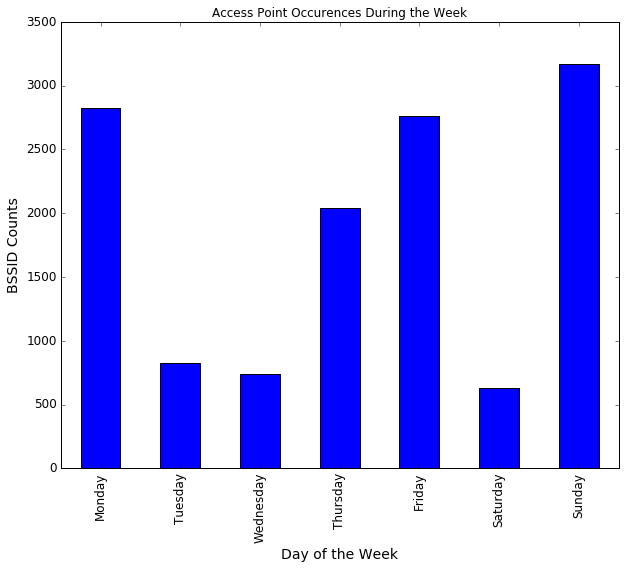

In [85]:
# Next, the bar-chart
ap_plot = df4[['BSSID']].plot(kind='bar',x=df4['weekday'],
       title="Access Point Occurences During the Week",legend=False, fontsize=12)
ap_plot.set_xlabel("Day of the Week",fontsize=14),
ap_plot.set_ylabel("BSSID Counts",fontsize=14),
plt.show()

### The trends observed from the chart are:
>#### 1. Peak actvity on Sundays, and nearly as high counts for Mondays and Fridays
>#### 2. A drop to low activity on Tuesday, that picks up on Thursdays, going into a high activity count on Fridays.
>#### 3. There is a dip on Saturdays (lowest count), but that quickly peaks the following day (Sundays)

### These trends are not exactly what I would expect, if it was the signals for my own 'home location' behavior:
>#### 1. I expect mid-level AP counts on Mondays-Fridays because I work from home 50% of the time, typically a half workday at home, and half workday at customer sites. I typically disable my mobile phone's wireless (to save battery life) when I am outside my home location, and rely on my mobile provider's 4G network instead. Hence, my trend for Mon-Fri will be more like a 1500 counts mark, instead of the peak and troughs observed in the trend above. (Note: my mobile phone is an Apple iOS, so there is no passive Android WiFi scan).
>#### 2. Saturday's trend is a good match with my behavior. I am mostly away from my home location, pre-occupied with outdoor activities such as walks around Darling Harbour, catching a footy game at the stadium, or plain hanging out in shopping malls. Hence low counts on Saturdays work for me as well.
>#### 3. Sunday's trend is also a perfect match. I am mostly at home on Sundays, doing the household chores, catching up on my Korean TV dramas, reading technical publications, etc. Being at home, the mobile phone WiFi is typically 'on' for the longest period during the week.

<br>
<div class="alert alert-info">
<b>Exercise 3 [Advanced] End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

## 2. Submit your notebook

Please make sure that you:
- Perform a final "Save and Checkpoint";
- Download a copy of the notebook in ".ipynb" format to your local machine using "File", "Download as", and "IPython Notebook (.ipynb)"; and
- Submit a copy of this file to the Online Campus.